#**importing required packages and uploading required files**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
file_path = "C:\\Users\\shahj\\OneDrive\\Desktop\\Projects\\Final-Retail-Sales-Forecasting-main"
print(os.path.exists(file_path))  # Should return True if the file is accessible

store_data = pd.read_csv(r"C:\Users\shahj\OneDrive\Desktop\Projects\Final-Retail-Sales-Forecasting-main\stores_data_set.csv")
feature_data = pd.read_csv(r"C:\Users\shahj\OneDrive\Desktop\Projects\Final-Retail-Sales-Forecasting-main\Features_data_set.csv")
sales_data = pd.read_csv(r"C:\Users\shahj\OneDrive\Desktop\Projects\Final-Retail-Sales-Forecasting-main\sales_data_set.csv")

True


#**Merging the datas to one file to another file using 'merge()'**

In [17]:
df1 = sales_data.merge(feature_data,on=['Store','Date','IsHoliday'],how = 'inner')
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [19]:
df = df1.merge(store_data,on=['Store'],how = 'inner')
# df.iloc[6550:6600]
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,26/10/2012,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [21]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

#**Using date column extracting the some features**

In [29]:
import warnings
warnings.filterwarnings("ignore")


df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['year'] = df['Date'].dt.year
# df['month'] = df['Date'].dt.month
# df['day'] = df['Date'].dt.day
df['week_of_year'] = df['Date'].dt.isocalendar().week


In [31]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week_of_year
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,2012,39
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,2012,40
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,2012,41
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,2012,42
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221,2012,43


#**Adding all markdown column in ti single column**

In [33]:
df.loc[(df['MarkDown1'].isnull()==True),'MarkDown1'] = 0
df.loc[(df['MarkDown2'].isnull()==True),'MarkDown2'] = 0
df.loc[(df['MarkDown3'].isnull()==True),'MarkDown3'] = 0
df.loc[(df['MarkDown4'].isnull()==True),'MarkDown4'] = 0
df.loc[(df['MarkDown5'].isnull()==True),'MarkDown5'] = 0

df['Markdown'] = df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']



In [35]:
import numpy as np
df['Markdown'].replace(0, np.nan, inplace=True)

In [37]:
data = df.copy()
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week_of_year,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,5,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,6,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,7,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,8,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,9,NaN


In [39]:
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,5,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,6,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,7,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,8,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,39,9468.01
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,40,9659.00
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,41,6554.03
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,42,3982.42


#**Checking correlation between the columns**

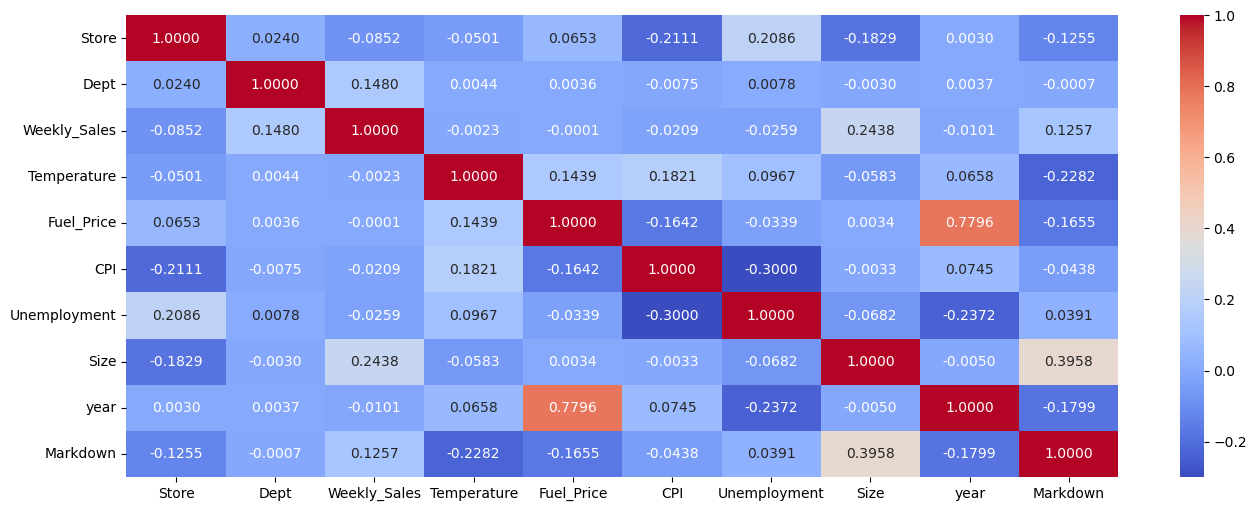

In [43]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,6))
# sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".4f")

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[float, int])

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(16,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".4f")
plt.show()


In [45]:
len(data['Fuel_Price'].unique())

892

In [47]:
import scipy.stats as st
st.f_oneway(data['Fuel_Price'],data['year'])

F_onewayResult(statistic=2010220620900.942, pvalue=0.0)

#**Checking the outlier using boxplot chart**

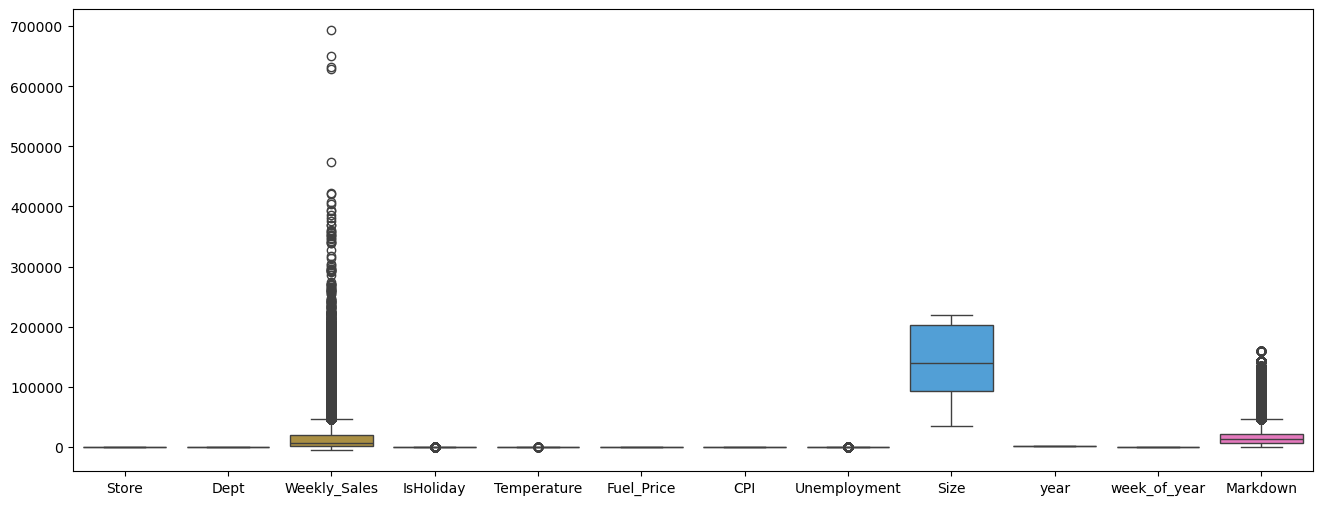

In [49]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

#**Checking data distribution**

Store


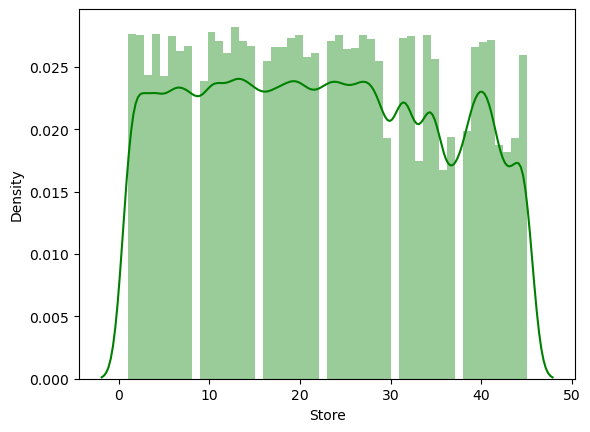

Dept


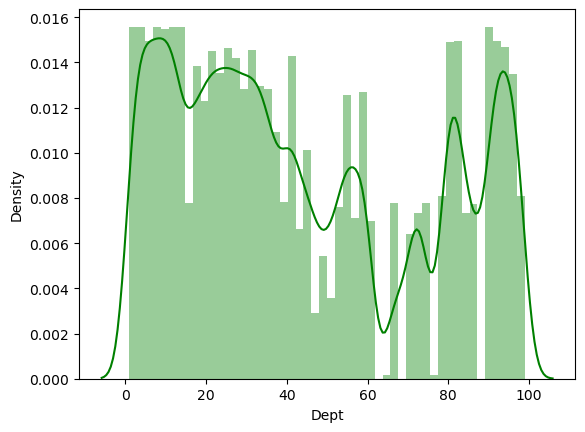

Date


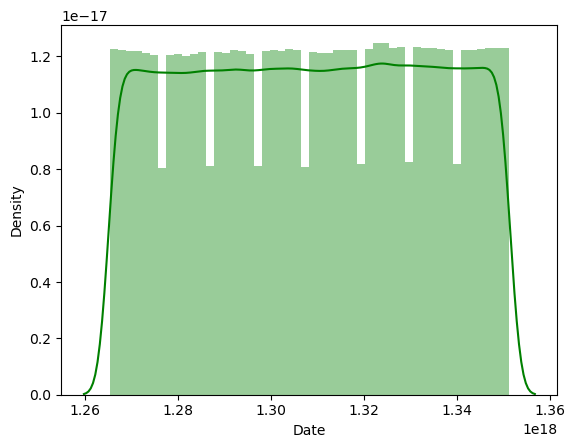

Weekly_Sales


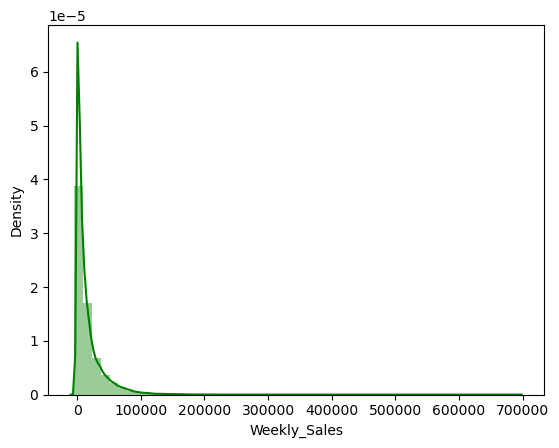

IsHoliday


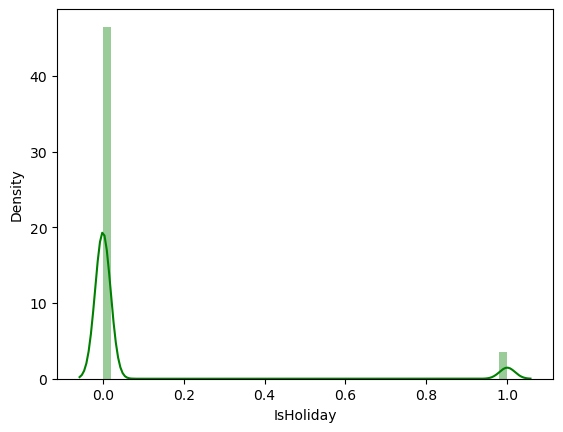

Temperature


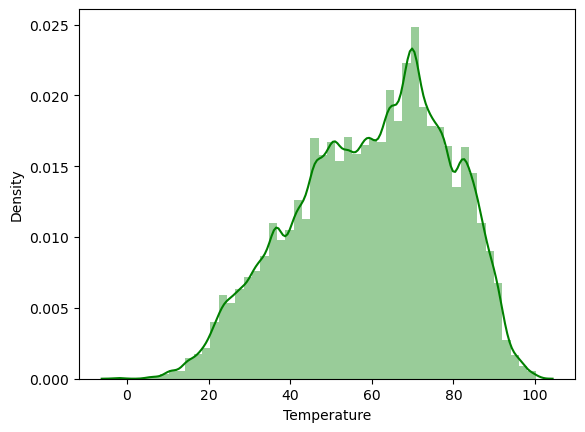

Fuel_Price


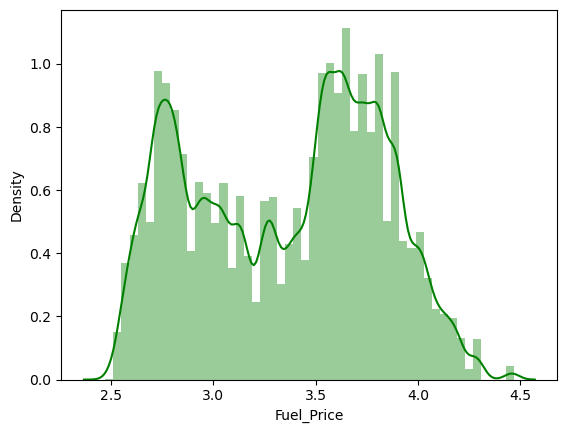

CPI


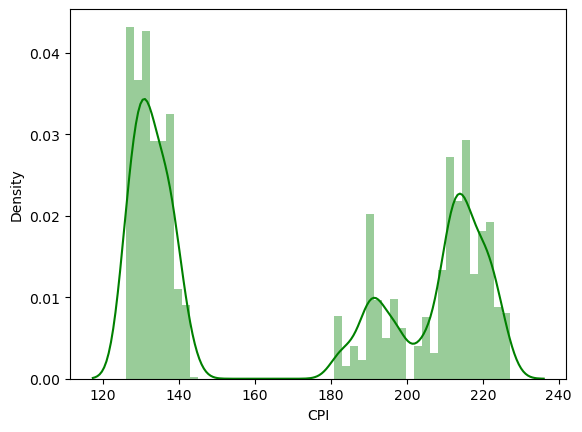

Unemployment


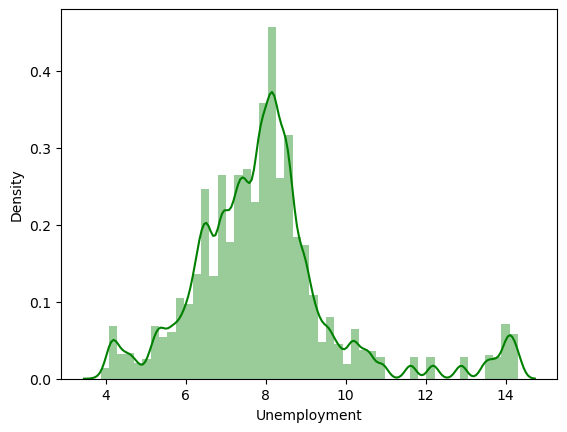

Size


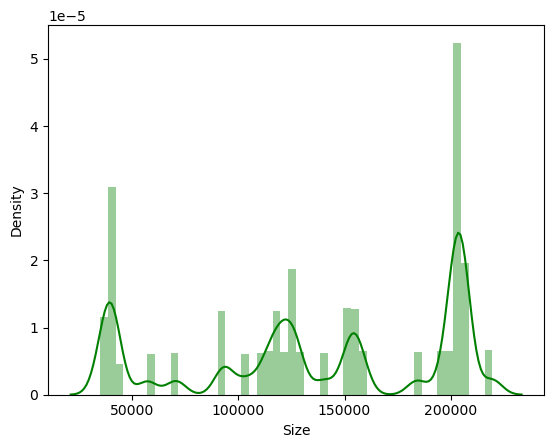

year


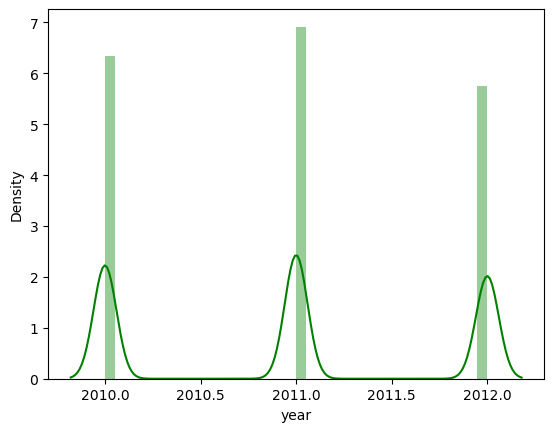

week_of_year


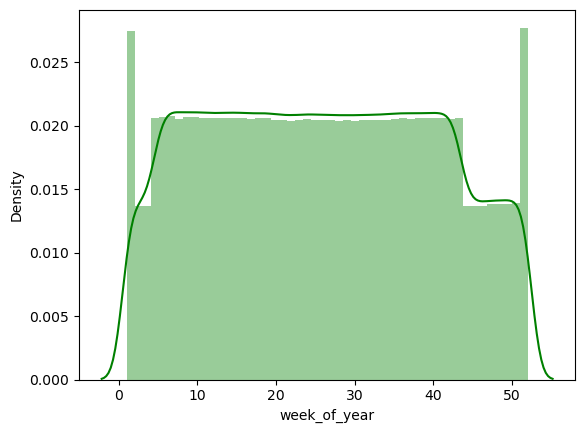

Markdown


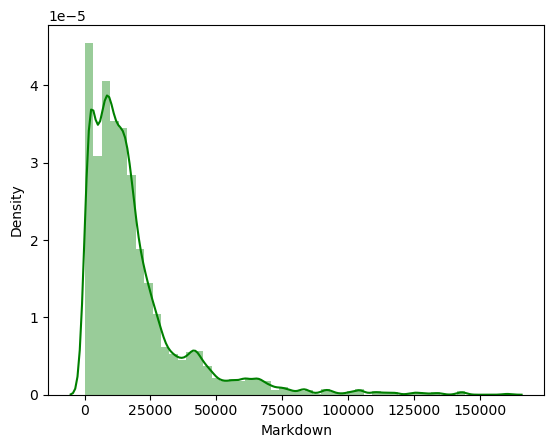

In [50]:
for i in data.columns:
  if data[i].dtype != 'object':
    print(i)
    sns.distplot(data[i],color="g")
    plt.show()

In [57]:
null = data[(data['Weekly_Sales']==0)]
null

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown
6055,1,47,2011-03-11,0.0,False,53.56,3.459,214.111056,7.742,A,151315,2011,10,NaN
6059,1,47,2011-08-12,0.0,False,90.76,3.638,215.605788,7.962,A,151315,2011,32,NaN
6060,1,47,2011-08-19,0.0,False,89.94,3.554,215.669311,7.962,A,151315,2011,33,NaN
16309,2,47,2012-04-13,0.0,False,68.08,3.891,221.148403,6.891,A,202307,2012,15,21715.91
17457,2,60,2010-03-19,0.0,False,54.52,2.720,210.873332,8.324,A,202307,2010,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403340,43,85,2012-01-13,0.0,False,43.68,3.261,211.411571,9.653,C,41062,2012,2,2327.99
407652,44,27,2011-01-14,0.0,False,20.60,2.903,127.300935,7.224,C,39910,2011,2,NaN
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,6,NaN
418079,45,54,2010-10-15,0.0,False,58.61,2.868,182.810620,8.724,B,118221,2010,41,NaN


In [59]:
null[null['IsHoliday']==True]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown
144299,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,52,NaN
165197,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,36,NaN
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,6,NaN


In [61]:
c = 0
for i,j,k in zip(null['Store'],null['Dept'],null['Type']):
  mean = data[(data['Store']==i)&(data['Dept']==j)&(data['Type']==k)]['Weekly_Sales'].mean()
  data.loc[(data['Weekly_Sales']==0)&(data['Store']==i)&(data['Dept']==j)&(data['Type']==k)&(data['IsHoliday']==False),'Weekly_Sales'] = mean
  c+=1
data.loc[data['Weekly_Sales']==0,'Markdown'] = 0
print(c)

73


In [63]:
null = data[(data['Weekly_Sales']==0)]
null

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown
144299,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,52,0.0
165197,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,36,0.0
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,6,0.0


In [65]:
data1 = data.copy()

#**Using the inverse Transformation for 'Weekly_Sales' colunm**

In [67]:
def inv_trans(x):
  if x == 0:
    return x
  else:
    return 1/x

data1['weekly_sales'] = data1['Weekly_Sales'].apply(inv_trans)

In [69]:
data1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,5,NaN,0.000040
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,6,NaN,0.000022
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,7,NaN,0.000024
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,8,NaN,0.000052
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,9,NaN,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,39,9468.01,0.001967
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,40,9659.00,0.001592
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,41,6554.03,0.000942
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,42,3982.42,0.001316


In [71]:
data1[data1['weekly_sales']==0.0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
144299,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,52,0.0,0.0
165197,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,36,0.0,0.0
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,6,0.0,0.0


In [73]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  year          421570 non-null  int32         
 12  week_of_year  421570 non-null  UInt32        
 13  Markdown      151435 non-null  float64       
 14  weekly_sales  421570 non-null  float64       
dtypes: UInt32(1), boo

#**Checking the data after using the inverse transformation**

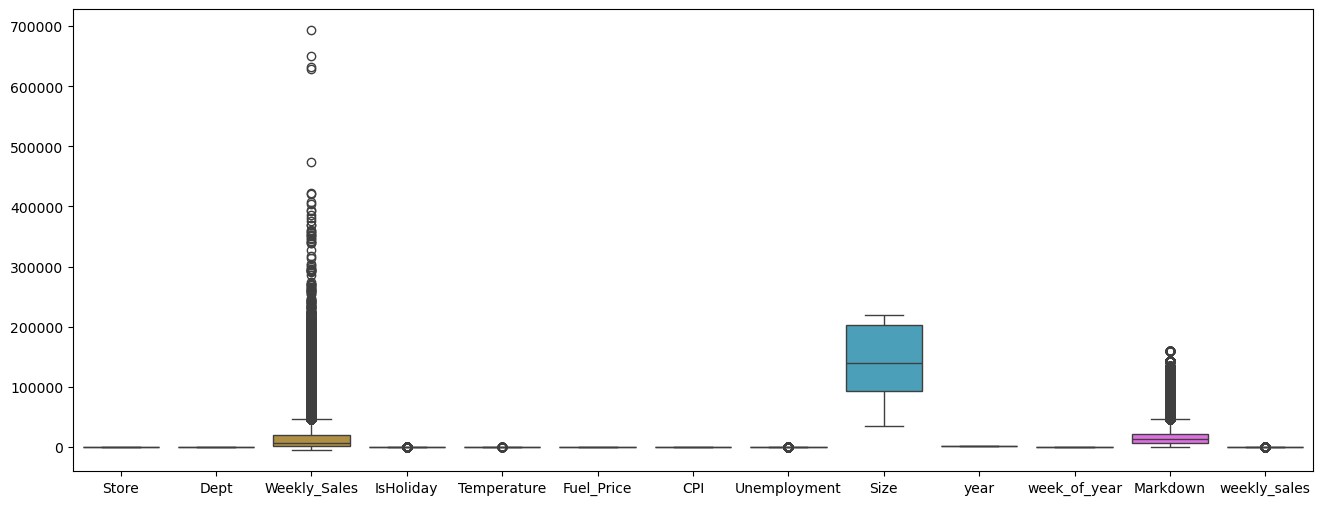

In [75]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data1)
plt.show()

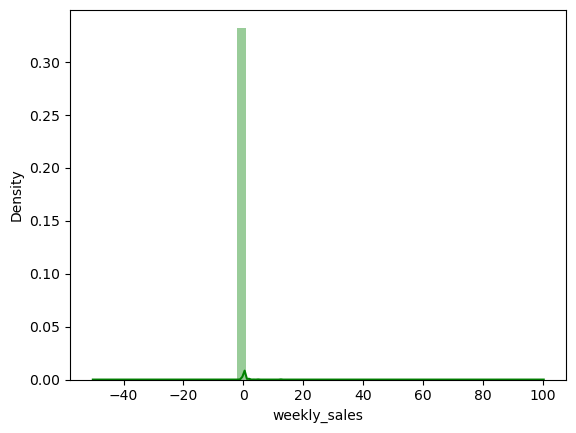

In [76]:
sns.distplot(data1['weekly_sales'],color="g")
plt.show()

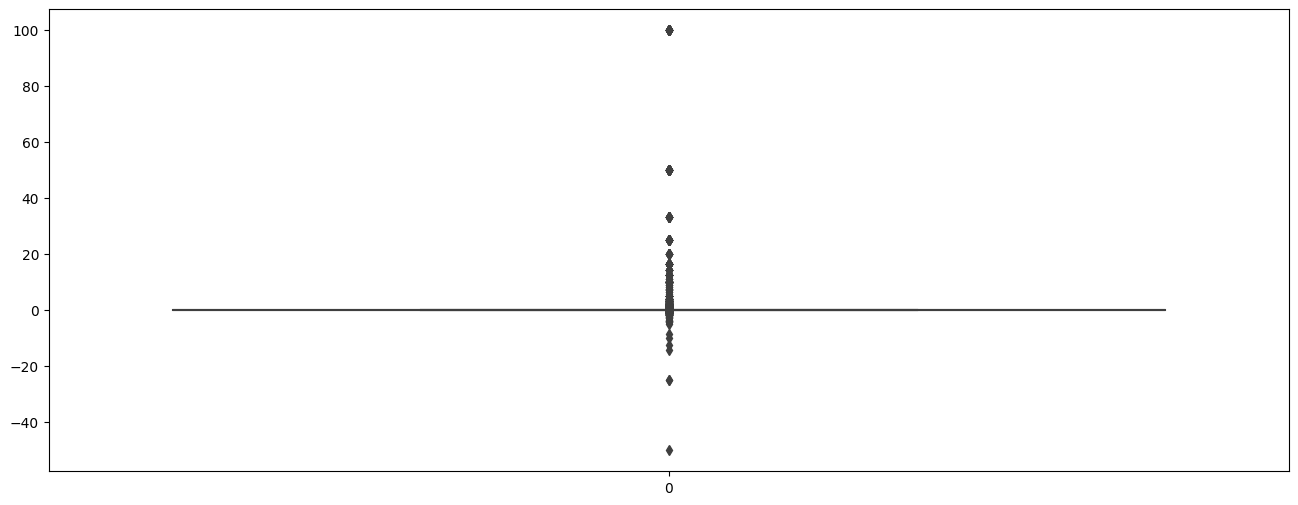

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data1['weekly_sales'])
plt.show()

In [77]:
data1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,5,NaN,0.000040
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,6,NaN,0.000022
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,7,NaN,0.000024
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,8,NaN,0.000052
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,9,NaN,0.000046


In [81]:
data1['IsHoliday'] = data1['IsHoliday'].astype('str')


#**Data Preprocesing**

In [83]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

enc=OrdinalEncoder()

for i in data1.columns:
  if data1[i].dtype == 'object'  :
      print(i)
      col_name = i
      data1[i] = enc.fit_transform(data1[[i]])
      encode = data1[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
      globals()[col_name] = {}
      decoded_data = enc.inverse_transform(data1[[i]])
      decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
      globals()[i] = dict(zip(decoded, encode))


IsHoliday
Type


In [85]:
print(Type)
print(IsHoliday)

{'A': 0.0, 'B': 1.0, 'C': 2.0}
{'False': 0.0, 'True': 1.0}


In [87]:
data1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,5,NaN,0.000040
1,1,1,2010-02-12,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,6,NaN,0.000022
2,1,1,2010-02-19,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,7,NaN,0.000024
3,1,1,2010-02-26,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,8,NaN,0.000052
4,1,1,2010-03-05,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,9,NaN,0.000046


In [89]:
null_data = data1[data1['Markdown'].isnull()==True]
null_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,5,NaN,0.000040
1,1,1,2010-02-12,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,6,NaN,0.000022
2,1,1,2010-02-19,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,7,NaN,0.000024
3,1,1,2010-02-26,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,8,NaN,0.000052
4,1,1,2010-03-05,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,9,NaN,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421514,45,98,2011-10-07,894.98,0.0,55.82,3.583,187.483796,8.523,1.0,118221,2011,40,NaN,0.001117
421515,45,98,2011-10-14,996.40,0.0,63.82,3.541,187.691748,8.523,1.0,118221,2011,41,NaN,0.001004
421516,45,98,2011-10-21,1058.84,0.0,59.60,3.570,187.784620,8.523,1.0,118221,2011,42,NaN,0.000944
421517,45,98,2011-10-28,1167.90,0.0,51.78,3.569,187.877491,8.523,1.0,118221,2011,43,NaN,0.000856


In [91]:
not_null_data = data1[data1['Markdown'].isnull()==False]
not_null_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
92,1,1,2011-11-11,18689.54,0.0,59.11,3.297,217.998085,7.866,0.0,151315,2011,45,25671.68,0.000054
93,1,1,2011-11-18,19050.66,0.0,62.25,3.308,218.220509,7.866,0.0,151315,2011,46,12796.45,0.000052
94,1,1,2011-11-25,20911.25,1.0,60.14,3.236,218.467621,7.866,0.0,151315,2011,47,56876.74,0.000048
95,1,1,2011-12-02,25293.49,0.0,48.91,3.172,218.714733,7.866,0.0,151315,2011,48,29655.58,0.000040
96,1,1,2011-12-09,33305.92,0.0,43.93,3.158,218.961846,7.866,0.0,151315,2011,49,22865.91,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,2012,39,9468.01,0.001967
421566,45,98,2012-10-05,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,2012,40,9659.00,0.001592
421567,45,98,2012-10-12,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,2012,41,6554.03,0.000942
421568,45,98,2012-10-19,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,2012,42,3982.42,0.001316


In [93]:
import scipy.stats as st
# st.f_oneway(not_null_data['IsHoliday'],not_null_data['weekly_sales'])
tab = pd.crosstab(not_null_data['IsHoliday'],not_null_data['Type'])
st.chi2_contingency(tab)

Chi2ContingencyResult(statistic=0.11978797339926359, pvalue=0.9418643784429717, dof=2, expected_freq=array([[71030.33473107, 54078.44903754, 14332.21623139],
       [ 6109.66526893,  4651.55096246,  1232.78376861]]))

<Axes: >

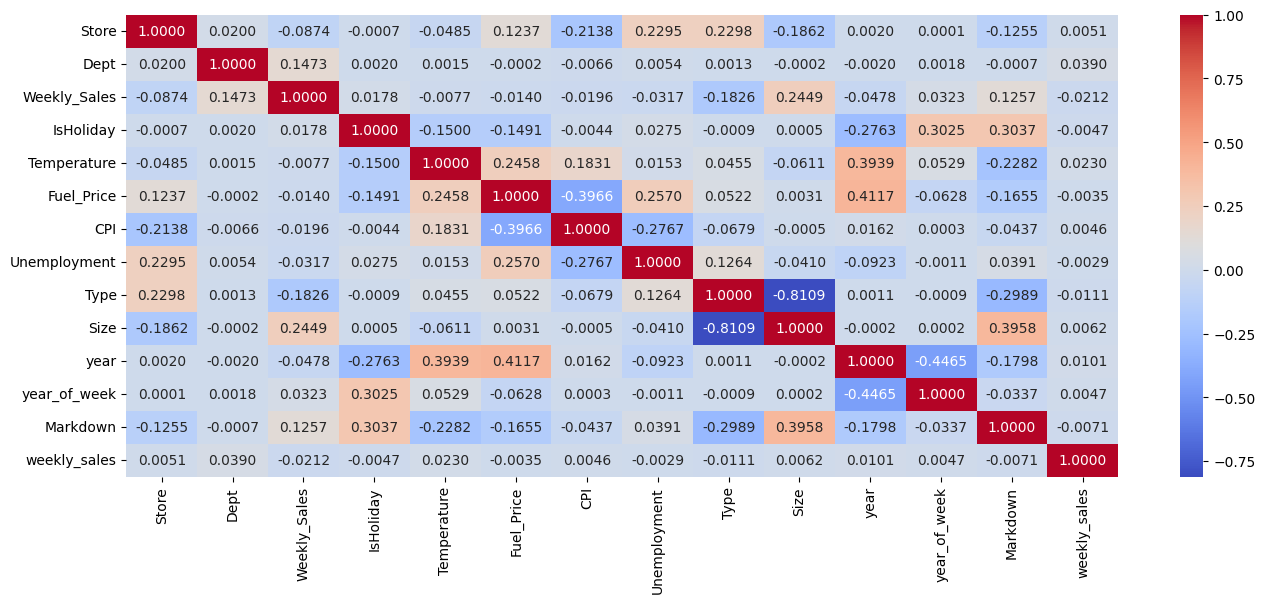

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.heatmap(not_null_data.corr(),annot=True,cmap="coolwarm",fmt=".4f")

#**Machine learning for filling the null values in 'markdown' column**

In [95]:
x = not_null_data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1)
y = not_null_data['Markdown']
y

92        25671.68
93        12796.45
94        56876.74
95        29655.58
96        22865.91
            ...   
421565     9468.01
421566     9659.00
421567     6554.03
421568     3982.42
421569     5247.26
Name: Markdown, Length: 151435, dtype: float64

In [97]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=250,random_state=10,max_depth=15,min_samples_split=5)
model.fit(x,y)
y_pred = model.predict(null_data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1))

In [98]:
y_pred

array([134494.04452   ,  37687.61392   ,  35969.35311178, ...,
        34852.32699839,  34855.09243839,  34123.16508539])

In [99]:
y_pred1 = model.predict(x)

In [100]:
y_pred1 = model.predict(x)
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(y, y_pred1)

2167.685350062511

In [101]:
print(y_pred1)

[27075.21085349 12968.65614343 56876.74       ...  6563.31592225
  4034.87871746  5259.24383746]


In [102]:
null_data['Markdown'] = y_pred

In [103]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x, y)

KNeighborsRegressor(n_neighbors=3)

In [104]:
y_pred = neigh.predict(null_data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1))
y_pred

array([39808.76      , 39808.76      , 39808.76      , ...,
        4825.64666667, 11828.15      , 35911.4       ])

In [105]:
y_pred1 = neigh.predict(x)
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y, y_pred1))
y_pred1

1174.8625974620577


array([30856.85      , 13994.64666667, 56876.74      , ...,
        5696.82666667,  4839.62333333,  4825.64666667])

In [106]:
# null_data['Markdown'] = y_pred

In [107]:
null_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,5,134494.044520,0.000040
1,1,1,2010-02-12,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,6,37687.613920,0.000022
2,1,1,2010-02-19,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,7,35969.353112,0.000024
3,1,1,2010-02-26,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,8,29482.201753,0.000052
4,1,1,2010-03-05,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,9,29706.717793,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421514,45,98,2011-10-07,894.98,0.0,55.82,3.583,187.483796,8.523,1.0,118221,2011,40,34989.899625,0.001117
421515,45,98,2011-10-14,996.40,0.0,63.82,3.541,187.691748,8.523,1.0,118221,2011,41,35595.060205,0.001004
421516,45,98,2011-10-21,1058.84,0.0,59.60,3.570,187.784620,8.523,1.0,118221,2011,42,34852.326998,0.000944
421517,45,98,2011-10-28,1167.90,0.0,51.78,3.569,187.877491,8.523,1.0,118221,2011,43,34855.092438,0.000856


In [108]:
null_data['Markdown'].max()

137419.44536000042

In [109]:
# pd.set_option('display.max_rows', 100)


In [110]:
data = null_data.merge(not_null_data,how = 'outer')
data.shape

(421570, 15)

In [111]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week_of_year,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,5,134494.044520,0.000040
1,1,1,2010-02-12,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,6,37687.613920,0.000022
2,1,1,2010-02-19,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,7,35969.353112,0.000024
3,1,1,2010-02-26,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,8,29482.201753,0.000052
4,1,1,2010-03-05,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,9,29706.717793,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,2012,39,9468.010000,0.001967
421566,45,98,2012-10-05,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,2012,40,9659.000000,0.001592
421567,45,98,2012-10-12,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,2012,41,6554.030000,0.000942
421568,45,98,2012-10-19,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,2012,42,3982.420000,0.001316


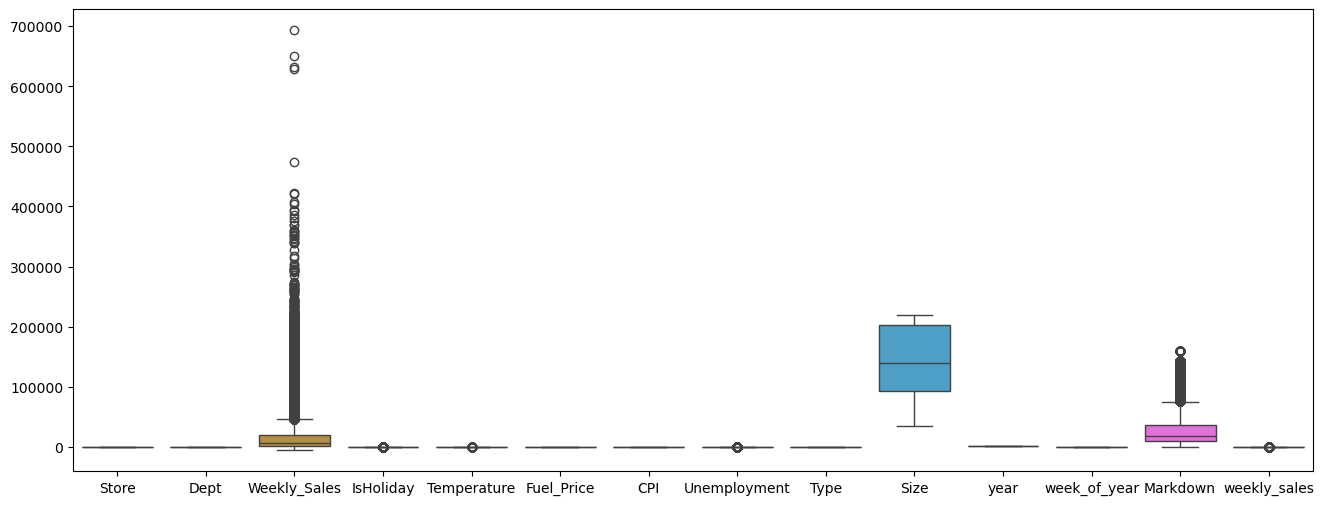

In [112]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

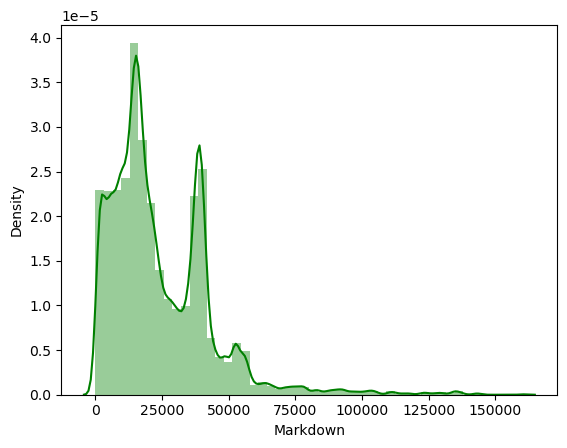

In [113]:
sns.distplot(data['Markdown'],color="g")
plt.show()

In [114]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
week_of_year    0
Markdown        0
weekly_sales    0
dtype: int64

#**After filling the 'Markdown' column storing the data in to  new file**

In [115]:
data.to_csv('Cleaned_Store_data2.csv',index = False)

In [116]:
df = pd.read_csv('/content/Cleaned_Store_data2.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Cleaned_Store_data2.csv'

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df['Weekly_Sales'])
plt.show()

In [ ]:
df.drop(['Date','weekly_sales'],axis = 1, inplace = True)

# **Seperating the continuous and categorical column for checking the corelation and hypothesis testing**

In [ ]:
continuous = df[['Markdown','Unemployment','CPI','Fuel_Price','Temperature','Weekly_Sales']]
continuous.head()

In [ ]:
categorical = df[['Store','Size','Dept','IsHoliday','year','year_of_week','Type']]
categorical.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".4f")

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=continuous)
plt.show()

In [ ]:
for i in df.columns:
  print(i, df[i].skew())

In [ ]:
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

for i in continuous.columns:
  for j in continuous.columns:
    f_statistic, p_value = stats.f_oneway(df[i],df[j])
    if p_value > 0.05:
      print(i,j,p_value)


In [ ]:
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

for i in categorical.columns:
  for j in categorical.columns:
    contingency_table = pd.crosstab(df[i], df[j])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05:
      print(i,j,p_value)


Store IsHoliday 1.0
Store year 0.9999930970270402
Store year_of_week 1.0
Size IsHoliday 1.0
Size year 0.9999373554912366
Size year_of_week 1.0
Dept year_of_week 1.0
IsHoliday Store 1.0
IsHoliday Size 1.0
IsHoliday Type 0.8019943216474763
year Store 0.9999930970270402
year Size 0.9999373554912366
year_of_week Store 1.0
year_of_week Size 1.0
year_of_week Dept 1.0
year_of_week Type 1.0
Type IsHoliday 0.8019943216474763
Type year_of_week 1.0


In [ ]:
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

for i in df.columns:
  for j in df.columns:
    f_statistic, p_value = f_oneway(df[i],df[j])
    if p_value > 0.05:
      print(i,j,p_value)

In [ ]:
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

for i in df.columns:
  print(f_oneway(df[i],df['Weekly_Sales']))

In [ ]:
categorical1 = df[['Store','Dept','year','year_of_week']]
categorical1.head()

In [ ]:
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

for i in categorical1.columns:
  for j in categorical1.columns:
    contingency_table = pd.crosstab(df[i], df[j])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05:
      print(i,j,p_value)


In [ ]:
df.drop(['Fuel_Price','Temperature','Size','Type'],axis = 1, inplace = True)

In [ ]:
df.head()

In [ ]:
data = df.copy()

# **Applying inverse transformation for 'Markdown' Column**

In [ ]:
def inv_trans(x):
  if x == 0:
    return x
  else:
    return 1/x

data['Markdown'] = data['Markdown'].apply(inv_trans)

In [ ]:
data.head()

# **Machine learning for predicting the Weekly sales**

In [ ]:
x = data.drop(['Weekly_Sales','Unemployment','CPI','IsHoliday'],axis = 1)
y = data['Weekly_Sales']
x

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 35)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42,max_depth=50,min_samples_split=5)#,min_samples_split=10, max_depth=10)4294967295
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=300,random_state=10,max_depth=25,min_samples_split=2)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x, y)
y_pred= neigh.predict(x_test)
y_pred1 = neigh.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

In [ ]:
from sklearn.tree import ExtraTreeRegressor

model = ExtraTreeRegressor(random_state=42,max_depth=100,min_samples_split=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

In [ ]:
from sklearn.ensemble import BaggingRegressor

model1 = BaggingRegressor(n_estimators=100,random_state=10,max_samples=10)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model1 = AdaBoostRegressor(n_estimators=1000,random_state=30,learning_rate=0.1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor(n_estimators=1000,random_state=30,learning_rate=0.1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))